In [12]:
# For reading data sets from the web.
import pandas
# For lots of great things.
import numpy as np
# To make our plots.
import matplotlib.pyplot as plt
%matplotlib inline
# Because sympy and LaTeX make
# everything look wonderful!
from sympy import *
init_printing(use_latex=True)
from IPython.display import display
# We will use this to check our implementation...
from sklearn.decomposition import PCA
# We will grab another data set using Keras
# after we finish up with Iris...
import keras
# Need this for LabelEncoder
from sklearn import preprocessing

In [13]:
student_data = np.array(pandas.read_table("./student-por.csv",
delimiter=";", header=0))



In [14]:
np.random.shuffle(student_data)
student_data

array([['GP', 'F', 15, ..., 12, 12, 12],
       ['MS', 'M', 19, ..., 5, 8, 0],
       ['MS', 'M', 18, ..., 9, 10, 9],
       ...,
       ['GP', 'F', 15, ..., 13, 12, 12],
       ['GP', 'M', 16, ..., 11, 10, 10],
       ['MS', 'F', 18, ..., 13, 12, 13]], dtype=object)

In [15]:
scores = student_data[:,32]
scores


The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.

array([12, 0, 9, 0, 14, 11, 7, 14, 13, 14, 18, 12, 8, 17, 16, 14, 11, 11,
       13, 14, 12, 10, 10, 8, 16, 15, 11, 11, 7, 14, 13, 12, 11, 9, 14,
       10, 9, 17, 13, 10, 17, 10, 13, 11, 9, 10, 18, 9, 10, 12, 9, 9, 13,
       7, 11, 10, 14, 6, 17, 17, 14, 10, 11, 10, 12, 13, 12, 11, 14, 14,
       9, 17, 16, 11, 7, 11, 13, 10, 10, 13, 11, 17, 9, 14, 17, 8, 8, 13,
       17, 10, 10, 15, 11, 17, 12, 0, 12, 15, 12, 16, 11, 13, 10, 15, 15,
       16, 15, 14, 13, 13, 15, 11, 6, 9, 0, 15, 10, 10, 10, 16, 10, 15,
       11, 11, 11, 10, 12, 11, 11, 15, 11, 14, 14, 11, 13, 10, 12, 11, 14,
       15, 13, 18, 14, 11, 8, 10, 12, 11, 10, 10, 17, 14, 14, 8, 13, 13,
       13, 10, 15, 11, 10, 12, 10, 15, 12, 12, 11, 14, 14, 13, 16, 14, 13,
       11, 11, 9, 11, 13, 12, 9, 17, 13, 12, 16, 1, 11, 8, 17, 10, 13, 8,
       15, 11, 15, 10, 12, 12, 8, 16, 13, 17, 10, 7, 12, 8, 14, 17, 10,
       11, 13, 12, 13, 18, 16, 12, 12, 11, 13, 10, 19, 12, 12, 14, 9, 8,
       12, 11, 10, 11, 16, 13, 11, 8, 8, 14, 

In [16]:
for i in range(len(scores)):
    if(scores[i] > 18):
        scores[i] = 4
    elif(scores[i] > 16):
        scores[i] = 3
    elif(scores[i] > 14):
        scores[i] = 2
    elif(scores[i] > 12):
        scores[i] = 1
    else:
        scores[i] = 0


In [17]:
for i in range(len(scores)):
    student_data[i,32] = scores[i]
    
student_data

array([['GP', 'F', 15, ..., 12, 12, 0],
       ['MS', 'M', 19, ..., 5, 8, 0],
       ['MS', 'M', 18, ..., 9, 10, 0],
       ...,
       ['GP', 'F', 15, ..., 13, 12, 0],
       ['GP', 'M', 16, ..., 11, 10, 0],
       ['MS', 'F', 18, ..., 13, 12, 1]], dtype=object)

In [18]:
student_data.shape

In [19]:
le = preprocessing.LabelEncoder()

# Encoding non-numeric data to integers

In [20]:
# School (binomial)
le.fit(student_data[:,0])
student_data[:,0] = le.transform(student_data[:,0])

In [21]:
# Sex (binomial)
le.fit(student_data[:,1])
student_data[:,1] = le.transform(student_data[:,1])

In [22]:
# address (binomial)
le.fit(student_data[:,3])
student_data[:,3] = le.transform(student_data[:,3])

In [23]:
# Famsize (binomial)
le.fit(student_data[:,4])
student_data[:,4] = le.transform(student_data[:,4])

In [24]:
# Pstatus (binomial)
le.fit(student_data[:,5])
student_data[:,5] = le.transform(student_data[:,5])

In [25]:
# Mjob (nominal)
le.fit(student_data[:,8])
student_data[:,8] = le.transform(student_data[:,8])

In [26]:
# Fjob (nominal)
le.fit(student_data[:,9])
student_data[:,9] = le.transform(student_data[:,9])

In [27]:
# Reason (nominal)
le.fit(student_data[:,10])
student_data[:,10] = le.transform(student_data[:,10])

In [28]:
# Guardian (nominal)
le.fit(student_data[:,11])
student_data[:,11] = le.transform(student_data[:,11])

In [29]:
# schoolsup (binomial)
le.fit(student_data[:,15])
student_data[:,15] = le.transform(student_data[:,15])

In [30]:
# famsup (binomial)
le.fit(student_data[:,16])
student_data[:,16] = le.transform(student_data[:,16])

In [31]:
# paid (binomial)
le.fit(student_data[:,17])
student_data[:,17] = le.transform(student_data[:,17])

In [32]:
# activities (binomial)
le.fit(student_data[:,18])
student_data[:,18] = le.transform(student_data[:,18])

In [33]:
# nursery (binomial)
le.fit(student_data[:,19])
student_data[:,19] = le.transform(student_data[:,19])

In [34]:
# higher (binomial)
le.fit(student_data[:,20])
student_data[:,20] = le.transform(student_data[:,20])

In [35]:
# internet (binomial)
le.fit(student_data[:,21])
student_data[:,21] = le.transform(student_data[:,21])

In [36]:
# romantic (binomial)
le.fit(student_data[:,22])
student_data[:,22] = le.transform(student_data[:,22])

In [37]:
student_data

array([[0, 0, 15, ..., 12, 12, 0],
       [1, 1, 19, ..., 5, 8, 0],
       [1, 1, 18, ..., 9, 10, 0],
       ...,
       [0, 0, 15, ..., 13, 12, 0],
       [0, 1, 16, ..., 11, 10, 0],
       [1, 0, 18, ..., 13, 12, 1]], dtype=object)

# Encoding 0's to -1 for binomial data.

### Surely there's a one line method to do this... right, Keras?

In [38]:
school = student_data[:,0]
school = np.where(school==0, -1, school)
student_data[:,0] = school

In [39]:
sex = student_data[:,1]
sex = np.where(sex==0, -1, sex)
student_data[:,1] = sex

In [40]:
address = student_data[:,3]
address = np.where(address==0, -1, address)
student_data[:,3] = address

In [41]:
famsize = student_data[:,4]
famsize = np.where(famsize==0, -1, famsize)
student_data[:,4] = famsize

In [42]:
Pstatus = student_data[:,5]
Pstatus = np.where(Pstatus==0, -1, Pstatus)
student_data[:,5] = Pstatus

In [43]:
schoolsup = student_data[:,15]
schoolsup = np.where(schoolsup==0, -1, schoolsup)
student_data[:,15] = schoolsup

In [44]:
famsup = student_data[:,16]
famsup = np.where(famsup==0, -1, famsup)
student_data[:,16] = famsup

In [45]:
paid = student_data[:,17]
paid = np.where(paid==0, -1, paid)
student_data[:,17] = paid

In [46]:
activities = student_data[:,18]
activities = np.where(activities==0, -1, activities)
student_data[:,18] = activities

In [47]:
nursery = student_data[:,19]
nursery = np.where(nursery==0, -1, nursery)
student_data[:,19] = nursery

In [48]:
higher = student_data[:,20]
higher = np.where(higher==0, -1, higher)
student_data[:,20] = higher

In [49]:
internet = student_data[:,21]
internet = np.where(internet==0, -1, internet)
student_data[:,21] = internet

In [50]:
romantic = student_data[:,22]
romantic = np.where(romantic==0, -1, romantic)
student_data[:,22] = romantic

# Standardizing the nominal and numerical data.

In [51]:
scaler = preprocessing.StandardScaler()

### I don't think this warning is THAT concerning

In [52]:
temp = student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]]
Standardized = scaler.fit_transform(temp)

/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/nfshome/apps/python-3.6.7/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


### Not sure about the -0.0 for the mean...

In [53]:
print('Mean:', round(Standardized.mean()))
print('Standard deviation:', Standardized.std())

Mean: -0.0
Standard deviation: 1.0


In [54]:
student_data[:,[2,6,7,8,9,10,11,12,13,14,23,24,25,26,27,28,29,30,31]] = Standardized

In [55]:
x = student_data[:,0:32]

In [56]:
x[0,0:]

array([-1, -1, -1.4329802763043944, 1, -1, 1, -1.3360393847765342,
       -1.1888322936014033, 0.04694063202738386, 0.8982601164812474,
       -0.9339740507872134, -1.5949259932605189, -0.7600319244561619,
       0.08365294968062233, -0.3743051181921297, -1, 1, -1, -1, 1, 1, 1,
       -1, 0.07260614867809903, 0.7804782639289712, -1.0085456232078611,
       -0.5435553304269218, -0.2185083370694357, 1.0129025496993858,
       -0.7891594563761747, 0.2190637219551519, 0.14765857072539595],
      dtype=object)

In [57]:
results = student_data[:,32] # output vector

### Convert results to one-hot encoding
#### the actual output vector doesn't include at least one example of each possible grade so I made a vector of all possibilities for to_categorical

In [58]:
possible_results = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
possible_results_2 = [0,1,2,3,4]

In [59]:
#y = keras.utils.to_categorical(results, len(possible_results))
y = keras.utils.to_categorical(results,len(possible_results_2))

# Data is now preprocessed

### Note: columns 31 and 32 are not used. I do not believe they are useful for our net.

In [387]:
model = keras.Sequential()

In [388]:
input_size = x.shape[1]
output_size = y.shape[1]

In [389]:
# create the hidden layer
model.add(keras.layers.Dense(800,input_dim=input_size,activation='relu'))

In [390]:
model.add(keras.layers.Dense(400,activation='relu'))

In [391]:
# output layer
model.add(keras.layers.Dense(output_size,activation='softmax'))

In [392]:
# compile
model.compile(loss='categorical_crossentropy',optimizer='adamax', metrics=['accuracy'])

In [393]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 800)               26400     
_________________________________________________________________
dense_95 (Dense)             (None, 400)               320400    
_________________________________________________________________
dense_96 (Dense)             (None, 5)                 2005      
Total params: 348,805
Trainable params: 348,805
Non-trainable params: 0
_________________________________________________________________


# Model Training
## This is some results from training the model
## Loss seems to be going down slowly
## Interestingly val_loss seems to be increasing 
## I have ploted the loss below
## I could not plot accuracy which is weird and I will have to look into what is causing that
# Austin

In [394]:
history = model.fit(x,y,batch_size = 32, epochs = 40, verbose = 0, validation_split = 0.2)

In [395]:
score = model.evaluate(x,y, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.1575381685341084
Test accuracy: 0.9645608629577883


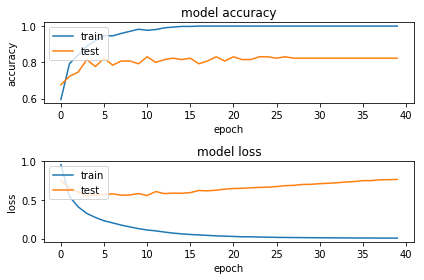

In [396]:
plt.figure(1)

# summarize history for accuracy

plt.subplot(211)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

# summarize history for loss

plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc ='upper left')

plt.tight_layout()
plt.show()

In [315]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8468774051071132
Test accuracy: 0.7642526964560863


In [72]:
## PCAs of Data

In [73]:
#def func(X):
 #   return X
#xFunc = np.apply_along_axis(func,0,x)


#U,S,V = np.linalg.svd(xFunc,full_matrices=True)

# Plot the percent of variance accounted for by each feature
#plt.plot(100.0*S/np.sum(S))
#plt.ylabel("Percent Variance")
#plt.xlabel("Singular Value")
#plt.show()

In [74]:
pca=PCA()
pca.fit(x)
pca_data = pca.transform(x)

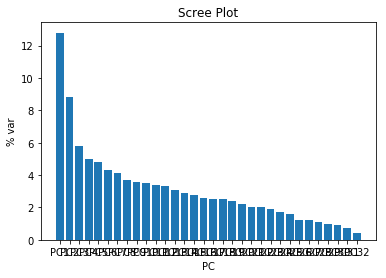

In [75]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals = 1)
labels = ['PC' + str(i) for i in range (1, len(per_var)+1)]

plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel("% var")
plt.xlabel("PC")
plt.title("Scree Plot")
plt.show()